In [5]:
""" setup """

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal

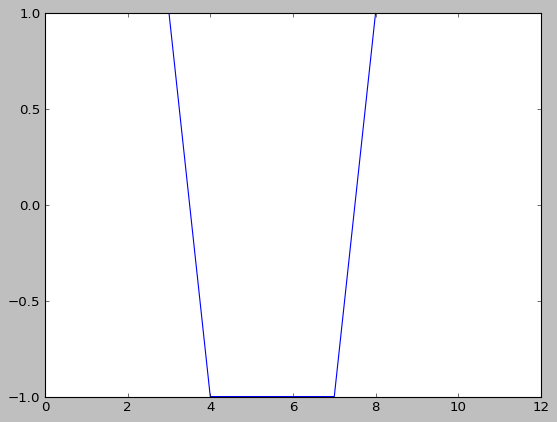

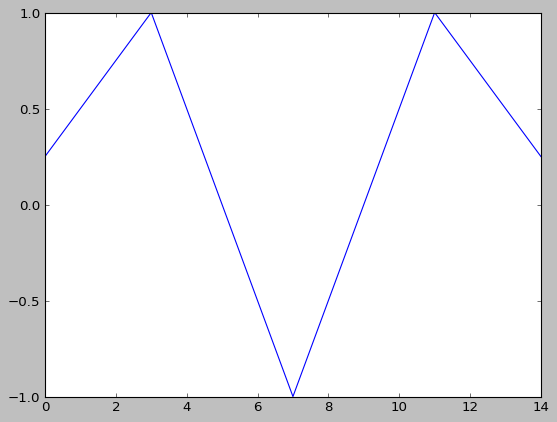

In [6]:
data = [1, 0, 1]
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
plt.plot(nrz_data)
plt.show()

taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')
plt.plot(match_filtered)
plt.show()

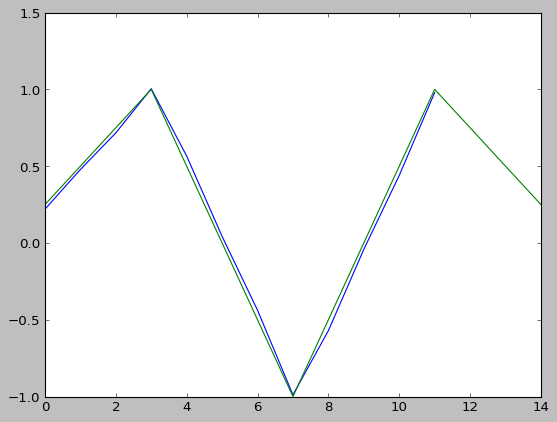

In [8]:
""" rx signal is AHEAD -> sampling LATE """
from pyha.simulation.simulation_interface import plot_assert_sim_match, SIM_HW_MODEL, SIM_MODEL

from pyhacores.under_construction.filter.phase_shifting_fir.model import PhaseShiftingFIR

i = PhaseShiftingFIR()
iff = [i.model_main(x, 0.1) for x in match_filtered]

plot_assert_sim_match(i, None, match_filtered, simulations=[SIM_MODEL, SIM_HW_MODEL])

plt.plot(iff[3:])
plt.plot(match_filtered)
plt.show()

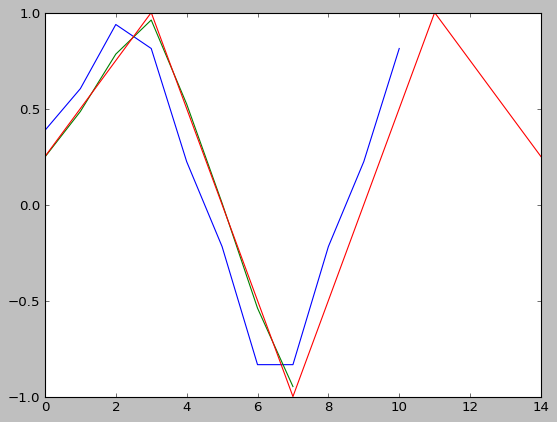

In [28]:
""" rx signal is BEHIND -> sampling EARLY """

i = Interpolator()
iff = [i.filter(x, 0.5) for x in match_filtered][1:]

i2 = Interpolator()
iff2 = [i2.filter(x, 1-0.5) for x in iff]

plt.plot(iff[3:])
plt.plot(iff2[6:])
plt.plot(match_filtered)
plt.show()
print(iff2[])

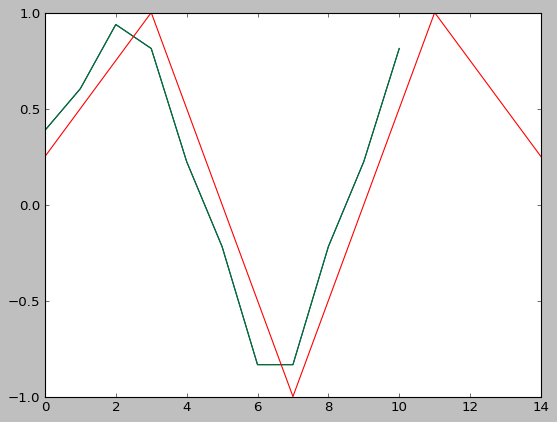

In [40]:
""" rx signal is BEHIND -> sampling EARLY """

i = Interpolator()
iff = [i.filter(x, 0.5) for x in match_filtered][1:]

i2 = Interpolator()
iff2 = [i2.filter(x, 0.5) for x in match_filtered]

plt.plot(iff[3:])
plt.plot(iff2[4:])
plt.plot(match_filtered)
plt.show()